# Multiple Choice and Fill in the Blank Questions (MCQs) (10 points each)

Q1. **Which of the following is not a common feature of Pandas DataFrames and Numpy 2D Arrays?**
   
   a) They are both table-like two-dimensional structures.
   
   b) They both support statistical functions for numerical valued columns.
   
   c) They both allow different columns to have different data types.
   
   d) They both provide features for data filtering.

In [1]:
def ans_q1():
  return 'c'

Q2. **Which method is used to get summary statistics of numeric columns in a DataFrame?**
   
   a) `df.info()`
   
   b) `df.describe()`
   
   c) `df.head()`
   
   d) `df.shape()`




In [2]:
def ans_q2():
  return 'b'

Q3. **What does the `iloc` method do in Pandas dataframes?**
   
   a) Selects rows by index labels
   
   b) Selects columns by labels
   
   c) Selects rows and columns by position
   
   d) Selects rows by boolean conditions




In [3]:
def ans_q3():
  return 'c'

Q4. **Given the following data:**

```
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Salary': [70000, 80000, 120000, 110000]
}
df = pd.DataFrame(data)
```
**Write the command to get all the values in the City column:**

In [4]:
def ans_q4():
  return 'df["City"]'

Q5. **For the same data as above, write the command to select the rows where the `Age` is greater than 30:**

In [5]:
def ans_q5():
  return 'df[df["Age"] > 30]'

Q6. (25 points) Write the code to eliminate a 60Hz noise (only 60Hz, not lower or higher frequencies) in a .wav format audio file with the Fast Fourier Transform and a simple filter using numpy.where() or numpy.array conditional indexing as in the sample code fft_audio_filter_where.py available on Canvas under Files, Lecture Slides. Include a comment line for each crucial command in the code. Visualization is not required. You should save your filtered audio file in .wav format but with a different name than the input file. A sample audio file is uploaded: Canvas --> Files --> Audio_Samples --> noise_a3s.wav.

In [25]:
# Add your code below
import scipy.io.wavfile as wav
from scipy.fft import fft, ifft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency to remove (Hz)
target_frequency = 60;

# Read the .wav file
sample_rate, data = wav.read("data/noise.wav")

# Convert from stereo to mono by averaging the data
# To make this better in the future you could handle each channel separately
if data.ndim > 1:
    data = data.mean(axis=1)

# Take the fourier transform
fft_data = fft(data)
# Find the index of the frequency we want to remove
frequencies = fftfreq(len(fft_data), 1/sample_rate)
index = np.argmin(np.abs(frequencies - target_frequency))

# Zero out the bad frequency
fft_data[index] = 0
fft_data[-index] = 0

# Apply the inverse fourier transform to get our filtered data
filtered_data = ifft(fft_data).real

# Write the filtered data to a new .wav file
# Use .astype(np.int16) since windows media player doesn't support float encoded .wav files
wav.write("data/filtered_noise.wav", sample_rate, filtered_data.astype(np.int16))
print("Done!")

Done!


Q7. (25 points) Review the house prices problem in [04b_predicting_data_from_linear_regression.ipynb](https://github.com/alp1991/ECE3_FALL24/blob/main/lectures/04b_predicting_from_data__linear_regression.ipynb) (Links to an external site.).

The house data set houses.csv is located at https://github.com/alp1991/ECE3_FALL24/blob/main/data/houses.csv Links to an external site.

Write the python code to generate the regression model for the following variables: Independent variables: 'baths' and 'area'. Dependent variable: 'price'. Using your model predict the price of a house with 2 baths and 1.022 thousand square feet area. Note that this problem is similar to the online activity in place of the lecture on Wednesday, November 27th. However, one of the independent variables is different. You can reuse parts of the code you submitted for the online activity for this lab.

Estimated price for a 1022 sq. ft. home with 2 bathrooms is $151723.39.


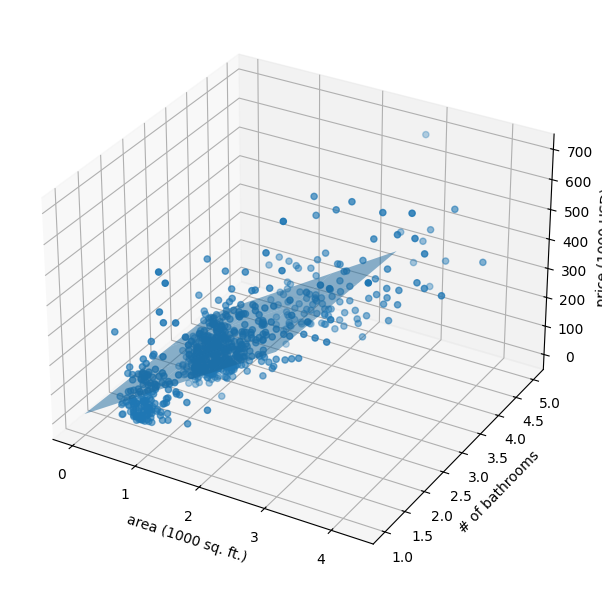

In [8]:
# Add your code below
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# os.cwd() workaround for incorrect path resolution with relative paths
# load data from the csv file
data = pd.read_csv(os.getcwd() + "/data/houses.csv")
# print(data)

# find least squares solution using np.lstsq
coefficient_matrix = np.column_stack((data['area'], data['baths'], np.ones(len(data))))
regression = np.linalg.lstsq(coefficient_matrix, data['price'], rcond=-1)[0]
# print(regression)

# define the regression function for any value given the coefficients from the least squares solution
regression_func = lambda area, bathrooms: regression[0] * area + regression[1] * bathrooms + regression[2]

# Set up axes
fg = plt.figure(figsize=(6, 6))
ax = fg.add_subplot(projection='3d')

# Set Labels
ax.set_xlabel("area (1000 sq. ft.)")
ax.set_ylabel("# of bathrooms")
ax.set_zlabel("price (1000 USD)")

# Scatter plot for the real data points
ax.scatter(data['area'], data['baths'], data['price'])

# Set up and plot the least squares best-fit plane using the regression function
x_values, y_values = np.meshgrid(range(4), range(1, 5))
z_values = regression_func(x_values, y_values)

# Use alpha of 0.5 so it doesn't look so bad
ax.plot_surface(x_values, y_values, z_values, alpha=0.5)

# Calculate for 1022 sq.ft and 2 bathrooms using the regression function. Expected result: $151,723
# Area is varied by a factor of 1000 for unit conversion, same for final price
sqft = 1022
bathrooms = 2
extrapolated_price = regression_func(sqft / 1000, bathrooms) * 1000
print(f"Estimated price for a {sqft} sq. ft. home with {bathrooms} bathrooms is ${extrapolated_price:.2f}.")